In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import roc_auc_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso, RidgeClassifier, ElasticNet 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
org_train = pd.read_csv('income_train.csv');
org_test = pd.read_csv('income_test.csv');

In [3]:
org_data = pd.concat([org_train,org_test],axis="rows",sort=False,ignore_index=True)
org_data.shape

(32561, 16)

In [4]:
org_data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education.num', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

In [5]:
org_data.rename(columns={org_data.columns[0]:'uniqueId'}, inplace=True)

In [6]:
#profile = pandas_profiling.ProfileReport(org_data)
#profile.to_file(outputfile='eda.html')

In [7]:
org_data.drop(columns=['uniqueId'],inplace=True)
org_data.shape

(32561, 15)

In [8]:
org_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
org_data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [10]:
org_data['income'] = org_data['income'].replace({'<=50K':0,'>50K':1})

In [11]:
org_data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,49,Private,180532,Masters,14,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0
1,35,Local-gov,308945,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,1
2,28,Private,47907,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
3,32,Private,198068,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,0,0,60,United-States,0
4,23,Private,192978,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,0


In [12]:
org_data.duplicated().sum()

24

In [13]:
org_data.drop_duplicates(inplace=True);

In [14]:
org_data['age'].unique()

array([49, 35, 28, 32, 23, 20, 46, 55, 26, 59, 43, 24, 58, 39, 29, 36, 45,
       40, 44, 41, 50, 56, 34, 54, 17, 21, 66, 61, 47, 42, 18, 25, 31, 22,
       30, 33, 60, 19, 62, 38, 52, 27, 37, 48, 69, 75, 57, 65, 51, 53, 67,
       70, 71, 64, 63, 77, 79, 68, 80, 73, 74, 72, 82, 90, 76, 78, 81, 84,
       83, 88, 86, 85, 87], dtype=int64)

In [15]:
org_data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-inc', 'State-gov',
       'Federal-gov', 'Self-emp-not-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
org_data[org_data['workclass'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5,20,?,141453,Some-college,10,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
15,36,?,216256,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3464,0,30,United-States,0
32,17,?,171461,10th,6,Never-married,?,Own-child,White,Female,0,0,20,United-States,0
33,21,?,191806,Some-college,10,Never-married,?,Own-child,White,Male,0,0,75,United-States,0
34,66,?,357750,11th,7,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,20,?,220115,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,12,United-States,0
32517,68,?,229016,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,0
32544,24,?,265434,Bachelors,13,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,0
32552,29,?,134566,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,1


In [17]:
org_data[org_data['occupation'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
5,20,?,141453,Some-college,10,Never-married,?,Own-child,White,Female,0,0,10,United-States,0
15,36,?,216256,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,3464,0,30,United-States,0
32,17,?,171461,10th,6,Never-married,?,Own-child,White,Female,0,0,20,United-States,0
33,21,?,191806,Some-college,10,Never-married,?,Own-child,White,Male,0,0,75,United-States,0
34,66,?,357750,11th,7,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,20,?,220115,HS-grad,9,Never-married,?,Own-child,White,Male,0,0,12,United-States,0
32517,68,?,229016,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,0,0,25,United-States,0
32544,24,?,265434,Bachelors,13,Never-married,?,Not-in-family,White,Female,0,0,40,United-States,0
32552,29,?,134566,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,1


In [18]:
org_data.drop(org_data[org_data['occupation'] == '?'].index,inplace = True)

In [19]:
org_data['fnlwgt'].isna().sum()

0

In [20]:
org_data['education'].unique()

array(['Masters', 'HS-grad', 'Bachelors', 'Some-college', 'Assoc-acdm',
       '12th', '10th', '7th-8th', '11th', '1st-4th', 'Assoc-voc',
       'Prof-school', '9th', '5th-6th', 'Preschool', 'Doctorate'],
      dtype=object)

In [21]:
org_data['education.num'].unique()

array([14,  9, 13, 10, 12,  8,  6,  4,  7,  2, 11, 15,  5,  3,  1, 16],
      dtype=int64)

In [22]:
org_data['occupation'].unique()

array(['Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Transport-moving', 'Handlers-cleaners', 'Tech-support', 'Sales',
       'Exec-managerial', 'Machine-op-inspct', 'Other-service',
       'Protective-serv', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [23]:
org_data['native.country'].unique()

array(['United-States', 'Puerto-Rico', 'Mexico', 'South', 'Guatemala',
       'Jamaica', 'Iran', 'England', 'Philippines', 'Columbia', '?',
       'Peru', 'China', 'Laos', 'Poland', 'Honduras', 'Ireland', 'India',
       'Japan', 'Cuba', 'Cambodia', 'Portugal', 'Germany', 'El-Salvador',
       'Scotland', 'Italy', 'France', 'Hungary', 'Haiti',
       'Dominican-Republic', 'Vietnam', 'Thailand', 'Nicaragua', 'Taiwan',
       'Greece', 'Canada', 'Trinadad&Tobago', 'Ecuador', 'Yugoslavia',
       'Outlying-US(Guam-USVI-etc)', 'Hong', 'Holand-Netherlands'],
      dtype=object)

In [24]:
org_data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
org_data['race'].unique()

array(['White', 'Black', 'Amer-Indian-Eskimo', 'Other',
       'Asian-Pac-Islander'], dtype=object)

In [26]:
org_data['relationship'].unique()

array(['Not-in-family', 'Husband', 'Own-child', 'Unmarried',
       'Other-relative', 'Wife'], dtype=object)

In [27]:
org_data[org_data['native.country'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
140,47,Self-emp-inc,207540,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,?,0
158,39,Private,188069,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,0
161,30,Private,201624,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,45,?,0
195,36,Self-emp-inc,216711,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,?,1
220,25,Self-emp-inc,181691,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32307,37,Private,220644,HS-grad,9,Divorced,Other-service,Unmarried,Black,Female,0,0,40,?,0
32430,42,Local-gov,177937,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,?,0
32505,36,Private,242713,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,40,?,0
32541,35,Private,75855,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Black,Male,7298,0,40,?,1


In [28]:
org_data.drop(org_data[org_data['native.country'] == '?'].index,inplace = True)

In [29]:
org_data.shape

(30139, 15)

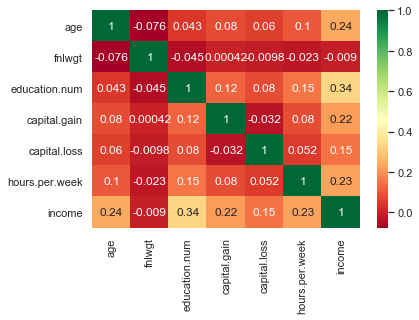

In [30]:
#plot heat map
sns.heatmap(org_data.corr(),annot=True,cmap="RdYlGn")

In [31]:
org_data.drop(columns=['fnlwgt'],inplace=True)

In [32]:
org_data.drop(columns=['education'],inplace=True)

In [33]:
org_data.shape

(30139, 13)

# Feature Engineering and Scaling and Data Split

In [34]:
cat_data=org_data.select_dtypes(exclude=np.number);
num_data=org_data.select_dtypes(include=np.number);

In [35]:
one_hot = pd.get_dummies(cat_data)

In [36]:
mod_data = pd.concat([one_hot,num_data],axis='columns')
mod_data.shape

(30139, 88)

In [37]:
x=mod_data.drop(columns=['income']);
y=mod_data['income'];

In [38]:
std= StandardScaler()
x_std=std.fit_transform(x)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.3,random_state=1)

In [40]:
algorithName=[]
f1_train=[];
f1_test=[];
model_name=[];
def model_fit(model,train_x,train_y,test_x,test_y,name,roc= False):
    model.fit(train_x,train_y)
    #model.predict_proba(train_x)
    y_train_pred = model.predict(train_x);
    f1Train=accuracy_score(train_y,y_train_pred)
    print(" Train Accuracy Score :",f1Train)
    #print(classification_report(train_y,y_train_pred))
    y_test_pred = model.predict(x_test);
    f1Test=accuracy_score(test_y,y_test_pred)
    print(" Test Accuracy Score :",f1Test)
    #print(classification_report(test_y,y_test_pred))
    algorithName.append(name)
    f1_train.append(f1Train)
    f1_test.append(f1Test)
    model_name.append(name)
    if (roc):
        roc_draw(x_train, y_train,model)

In [41]:
def exportResult(name,f1_train,f1_test):
    result = pd.DataFrame([name,f1_train,f1_test]).T;
    result.columns = ['Model','Accuracy_Train','Accuracy_Test'];
    result.to_excel('income_predict.xlsx',index=False);
    return result

# Predictive Algorithm

In [42]:
#logistic Regression Ridge
ridge = LogisticRegression(penalty='l2')
model_fit(ridge,x_train,y_train,x_test,y_test,'Ridge_logistic');

 Train Accuracy Score : 0.84917286818031
 Test Accuracy Score : 0.8461623534616235


In [43]:
#logistic Regression Lasso
lasso = LogisticRegression(solver='saga',penalty='l1')
model_fit(lasso,x_train,y_train,x_test,y_test,'Lasso_logistic');

 Train Accuracy Score : 0.8486040669289473
 Test Accuracy Score : 0.8446140234461402


C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [44]:
#logistic Regression Elastic Net
elastic = LogisticRegression(solver='saga',penalty='elasticnet',l1_ratio=0.7)
model_fit(elastic,x_train,y_train,x_test,y_test,'Elastic_logistic');

 Train Accuracy Score : 0.8486040669289473
 Test Accuracy Score : 0.8446140234461402


C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [45]:
# Gradient descent
gradient = SGDClassifier(loss='log',random_state=2)
model_fit(elastic,x_train,y_train,x_test,y_test,'Gradient_logistic');

 Train Accuracy Score : 0.8486040669289473
 Test Accuracy Score : 0.8447246184472462


C:\Users\z023209\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [46]:
# K-neighbor
knn = KNeighborsClassifier()
model_fit(knn,x_train,y_train,x_test,y_test,'KNeighbors_Classifier')

 Train Accuracy Score : 0.8754799260558374
 Test Accuracy Score : 0.827582393275824


In [47]:
# Bernoulli Naiye Bayes
bnb = BernoulliNB()
model_fit(bnb,x_train,y_train,x_test,y_test,'BernoulliNB')

 Train Accuracy Score : 0.7542304593070105
 Test Accuracy Score : 0.7547002875470029


In [48]:
# Gaussian Naiye Bayes
nb = GaussianNB()
model_fit(bnb,x_train,y_train,x_test,y_test,'GaussianNB')

 Train Accuracy Score : 0.7542304593070105
 Test Accuracy Score : 0.7547002875470029


In [49]:
# Decision Tree Gini
dt_gini = DecisionTreeClassifier(criterion="gini")
model_fit(dt_gini,x_train,y_train,x_test,y_test,'DecisionTreeClassifier_Gini')

 Train Accuracy Score : 0.9797127553680618
 Test Accuracy Score : 0.8158593231585932


In [50]:
# Decision Tree Entropy
dt_entropy = DecisionTreeClassifier(criterion="entropy")
model_fit(dt_entropy,x_train,y_train,x_test,y_test,'DecisionTreeClassifier_Entropy')

 Train Accuracy Score : 0.9797127553680618
 Test Accuracy Score : 0.8199513381995134


In [51]:
# AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
model_fit(ada,x_train,y_train,x_test,y_test,'AdaBoostClassifier')

 Train Accuracy Score : 0.8567094847608665
 Test Accuracy Score : 0.858438398584384


In [52]:
# Gradient Classifier
gb=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=1,max_features='auto')
model_fit(gb,x_train,y_train,x_test,y_test,'GradientBoostingClassifier')

 Train Accuracy Score : 0.8638669005071811
 Test Accuracy Score : 0.8620880336208804


In [53]:
# Xgb Boost
xgbBoost=XGBClassifier(n_estimators=50,learning_rate=0.05)
model_fit(xgbBoost,x_train,y_train,x_test,y_test,'XGBClassifier')

 Train Accuracy Score : 0.8484618666161066
 Test Accuracy Score : 0.8502543685025437


In [54]:
# Random Forest
rnd = RandomForestClassifier()
model_fit(rnd,x_train,y_train,x_test,y_test,'RandomForestClassifier')

 Train Accuracy Score : 0.9796653552637816
 Test Accuracy Score : 0.8484848484848485


In [55]:
# SVM Classifier
svm = SVC()
model_fit(svm,x_train,y_train,x_test,y_test,'SVMClassifier')

 Train Accuracy Score : 0.8541498791297341
 Test Accuracy Score : 0.847268303472683


In [56]:
exportResult(algorithName,f1_train,f1_test)

,Model,Accuracy_Train,Accuracy_Test
0,Ridge_logistic,0.849173,0.846162
1,Lasso_logistic,0.848604,0.844614
2,Elastic_logistic,0.848604,0.844614
3,Gradient_logistic,0.848604,0.844725
4,KNeighbors_Classifier,0.87548,0.827582
5,BernoulliNB,0.75423,0.7547
6,GaussianNB,0.75423,0.7547
7,DecisionTreeClassifier_Gini,0.979713,0.815859
8,DecisionTreeClassifier_Entropy,0.979713,0.819951
9,AdaBoostClassifier,0.856709,0.858438
